#### Importing Libraries

In [126]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

#### Importing Datasets

In [127]:
# path
path = r'C:\Users\monik\Desktop\Career Foundry\Course\Data Immersion\6 Advanced Analytics & Dashboard Design\House Sales in King County, USA'

In [128]:
# Import original dataset
df=pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'kc_house_data.csv'), index_col=False)

In [129]:
# Display all the columns
pd.options.display.max_columns = None

In [130]:
# Displaying numbers in float format
pd.set_option('display.float_format','{:.2f}'.format)

#### Initial Data Check

In [131]:
# Checking the first few columns
df. head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [132]:
# Checking shape
df.shape

(21613, 21)

In [133]:
# Checking data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [134]:
#Basic Descriptive Statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


#### Consisency Check

##### Mixed Type Data

In [135]:
# Checking for mixed type of columns
for col in df.columns.tolist():
    col_df = df[[col]]
    col_types = col_df.apply(lambda x: x.map(type))
    first_type = df[[col]].iloc[0].apply(type)
    weird = (col_types != first_type).any(axis=1)
    if len(df[weird]) > 0:
        print(col)

In [136]:
# Printing results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

There are no mixed-type columns.

##### Missing Values

In [137]:
#  Finding the amount of Missing Values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in this dataset.

##### Duplicates

In [138]:
# Finding duplicates
df_dups = df[df.duplicated()]

In [139]:
# Checking the number of duplicates
df_dups.shape

(0, 21)

There are no identical duplicates in this dataset.

#### Data Wrangling

In [140]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


##### Renaming Columns

In [141]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [142]:
df.rename(columns={'id':'property_id', 'yr_built': 'year_built', 'yr_renovated': 'year_renovated','sqft_lot':'sqft_land_area', 'lat':'latitude','long':'longitude', 'sqft_living15':'sqft_avg_neighbor_living','sqft_lot15':'sqft_avg_neighbor_land_area'},inplace=True)

In [143]:
df.columns

Index(['property_id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_land_area', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'year_built', 'year_renovated',
       'zipcode', 'latitude', 'longitude', 'sqft_avg_neighbor_living',
       'sqft_avg_neighbor_land_area'],
      dtype='object')

##### Changing data types

In [144]:
df.dtypes

property_id                      int64
date                            object
price                          float64
bedrooms                         int64
bathrooms                      float64
sqft_living                      int64
sqft_land_area                   int64
floors                         float64
waterfront                       int64
view                             int64
condition                        int64
grade                            int64
sqft_above                       int64
sqft_basement                    int64
year_built                       int64
year_renovated                   int64
zipcode                          int64
latitude                       float64
longitude                      float64
sqft_avg_neighbor_living         int64
sqft_avg_neighbor_land_area      int64
dtype: object

In [145]:
#Changing date type
df['date'] = pd.to_datetime(df['date'])

In [146]:
# Changing zipcode type
df['zipcode'] = df['zipcode'].astype('category')

In [147]:
df.dtypes

property_id                             int64
date                           datetime64[ns]
price                                 float64
bedrooms                                int64
bathrooms                             float64
sqft_living                             int64
sqft_land_area                          int64
floors                                float64
waterfront                              int64
view                                    int64
condition                               int64
grade                                   int64
sqft_above                              int64
sqft_basement                           int64
year_built                              int64
year_renovated                          int64
zipcode                              category
latitude                              float64
longitude                             float64
sqft_avg_neighbor_living                int64
sqft_avg_neighbor_land_area             int64
dtype: object

##### Frequency Checks

In [148]:
df['property_id'].value_counts()

property_id
795000620     3
2231500030    2
1237500540    2
6117501820    2
7853420110    2
             ..
8091400200    1
3814700200    1
1202000200    1
1794500383    1
2008000270    1
Name: count, Length: 21436, dtype: int64

In [149]:
df.sub = df[df['property_id'] == 795000620]

In [150]:
df.sub

,property_id,date,price,bedrooms,bathrooms,sqft_living,sqft_land_area,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area
17602,795000620,2014-09-24,115000.00,3,1.00,1080,6250,1.00,0,0,2,5,1080,0,1950,0,98168,47.50,-122.33,1070,6250
17603,795000620,2014-12-15,124000.00,3,1.00,1080,6250,1.00,0,0,2,5,1080,0,1950,0,98168,47.50,-122.33,1070,6250
17604,795000620,2015-03-11,157000.00,3,1.00,1080,6250,1.00,0,0,2,5,1080,0,1950,0,98168,47.50,-122.33,1070,6250


This shows that there are unidentical duplicates in the dataset. The property_id and the characteristics are the same, but the date and price varies. I decided to keep the latest property record in relation to date.

In [151]:
# Finding unidentical duplicates
df_dups = df[df.duplicated(subset=['property_id'], keep=False)]

In [152]:
# Viewing unidentical duplicates
df_dups

,property_id,date,price,bedrooms,bathrooms,sqft_living,sqft_land_area,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area
93,6021501535,2014-07-25,430000.00,3,1.50,1580,5000,1.00,0,0,3,8,1290,290,1939,0,98117,47.69,-122.39,1570,4500
94,6021501535,2014-12-23,700000.00,3,1.50,1580,5000,1.00,0,0,3,8,1290,290,1939,0,98117,47.69,-122.39,1570,4500
313,4139480200,2014-06-18,1384000.00,4,3.25,4290,12103,1.00,0,3,3,11,2690,1600,1997,0,98006,47.55,-122.10,3860,11244
314,4139480200,2014-12-09,1400000.00,4,3.25,4290,12103,1.00,0,3,3,11,2690,1600,1997,0,98006,47.55,-122.10,3860,11244
324,7520000520,2014-09-05,232000.00,2,1.00,1240,12092,1.00,0,0,3,6,960,280,1922,1984,98146,47.50,-122.35,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.00,4,2.50,2680,5539,2.00,0,0,3,8,2680,0,2013,0,98045,47.48,-121.73,2680,5992
20779,6300000226,2014-06-26,240000.00,4,1.00,1200,2171,1.50,0,0,3,7,1200,0,1933,0,98133,47.71,-122.34,1130,1598
20780,6300000226,2015-05-04,380000.00,4,1.00,1200,2171,1.50,0,0,3,7,1200,0,1933,0,98133,47.71,-122.34,1130,1598
21580,7853420110,2014-10-03,594866.00,3,3.00,2780,6000,2.00,0,0,3,9,2780,0,2013,0,98065,47.52,-121.89,2850,6000


In [153]:
# Checking current data shape
df.shape

(21613, 21)

In [154]:
# Deleting unidentical duplicates, while keeping the last record
df = df.drop_duplicates(subset=['property_id'], keep='last')

In [155]:
# Checking shape again
df.shape

(21436, 21)

In [156]:
# Checking frequency of property_id
df['property_id'].value_counts()

property_id
1523300157    1
7129300520    1
6414100192    1
5631500400    1
2487200875    1
             ..
1875500060    1
9297300055    1
1175000570    1
6054650070    1
114101516     1
Name: count, Length: 21436, dtype: int64

In [157]:
# Checking frequency of price
df['price'].value_counts()

price
450000.00     172
350000.00     167
550000.00     157
500000.00     151
425000.00     149
             ... 
3567000.00      1
569888.00       1
869950.00       1
389990.00       1
386950.00       1
Name: count, Length: 3997, dtype: int64

In [158]:
# Checking frequency of bedrooms
df['bedrooms'].value_counts()

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [159]:
# Checking frequency of bathrooms
df['bathrooms'].value_counts()

bathrooms
2.50    5355
1.00    3795
1.75    3020
2.25    2031
2.00    1913
1.50    1430
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.50       2
6.25       2
7.75       1
7.50       1
Name: count, dtype: int64

In [160]:
# Checking frequency of sqft_living	
df['sqft_living'].value_counts()

sqft_living
1300    136
1440    133
1400    132
1800    128
1660    128
       ... 
2398      1
2656      1
3281      1
1458      1
1572      1
Name: count, Length: 1038, dtype: int64

In [161]:
# Checking frequency of sqft_land_area
df['sqft_land_area'].value_counts()

sqft_land_area
5000     355
6000     286
4000     249
7200     218
4800     118
        ... 
15035      1
638        1
13405      1
1866       1
6560       1
Name: count, Length: 9782, dtype: int64

In [162]:
# Checking frequency of floors	
df['floors'].value_counts()

floors
1.00    10559
2.00     8209
1.50     1888
3.00      611
2.50      161
3.50        8
Name: count, dtype: int64

In [163]:
#Checking frequency of waterfront
df['waterfront'].value_counts()

waterfront
0    21273
1      163
Name: count, dtype: int64

In [164]:
#Checkingfrequency of view	
df['view'].value_counts()

view
0    19320
2      962
3      507
1      331
4      316
Name: count, dtype: int64

In [165]:
# Checking frequency of condition
df['condition'].value_counts()

condition
3    13911
4     5645
5     1687
2      164
1       29
Name: count, dtype: int64

In [166]:
# Checking frequency of grade
df['grade'].value_counts()

grade
7     8896
8     6044
9     2606
6     1995
10    1130
11     396
5      234
12      89
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [167]:
# Checking frequency of sqft_above
df['sqft_above'].value_counts()

sqft_above
1300    210
1010    204
1200    203
1220    186
1140    183
       ... 
1766      1
2301      1
3274      1
1108      1
1606      1
Name: count, Length: 946, dtype: int64

In [168]:
# Checking the frequency of sqft_basement
df['sqft_basement'].value_counts()

sqft_basement
0       13015
600       220
700       215
500       211
800       206
        ...  
176         1
225         1
1275        1
274         1
248         1
Name: count, Length: 306, dtype: int64

In [169]:
#Checking he frequency of year_built
df['year_built'].value_counts()

year_built
2014    559
2006    454
2005    450
2004    429
2003    422
       ... 
1933     29
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

In [170]:
# Checking frequency of year_renovated
df['year_renovated'].value_counts()

year_renovated
0       20526
2014       91
2013       37
2003       36
2005       35
        ...  
1948        1
1951        1
1959        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

The number 0 in this case means that the house was not renovated at all. However it is displayed, as it was renovated in the year 0 Anno Domini. Thus I will replace 0 wih nan.

In [171]:
# Replacing 0 from year renovated to nan
df['year_renovated'] = df['year_renovated'].replace(0, np.nan)

In [172]:
# Checking the frequency of zipcode	
df['zipcode'].value_counts()

zipcode
98103    600
98038    587
98115    576
98052    571
98117    548
        ... 
98102    105
98010     99
98024     80
98148     56
98039     49
Name: count, Length: 70, dtype: int64

#### Outliers

In [173]:
df.describe()

,property_id,date,price,bedrooms,bathrooms,sqft_living,sqft_land_area,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,latitude,longitude,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area
count,21436.00,21436,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,910.00,21436.00,21436.00,21436.00,21436.00
mean,4580765328.18,2014-10-29 17:30:02.351184896,541649.96,3.37,2.12,2082.70,15135.64,1.50,0.01,0.24,3.41,7.66,1790.96,291.74,1971.10,1995.90,47.56,-122.21,1988.31,12785.96
min,1000102.00,2014-05-02 00:00:00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,1934.00,47.16,-122.52,399.00,651.00
25%,2123700078.75,2014-07-22 00:00:00,324866.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1200.00,0.00,1952.00,1987.00,47.47,-122.33,1490.00,5100.00
50%,3904921185.00,2014-10-17 00:00:00,450000.00,3.00,2.25,1920.00,7614.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,2000.00,47.57,-122.23,1840.00,7620.00
75%,7308675062.50,2015-02-18 00:00:00,645000.00,4.00,2.50,2550.00,10696.25,2.00,0.00,0.00,4.00,8.00,2220.00,560.00,1997.00,2007.00,47.68,-122.12,2370.00,10087.25
max,9900000190.00,2015-05-27 00:00:00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,47.78,-121.31,6210.00,871200.00
std,2876589633.67,NaN,367314.93,0.93,0.77,919.15,41538.62,0.54,0.09,0.77,0.65,1.17,829.03,442.78,29.39,15.50,0.14,0.14,685.70,27375.47


<function matplotlib.pyplot.show(close=None, block=None)>

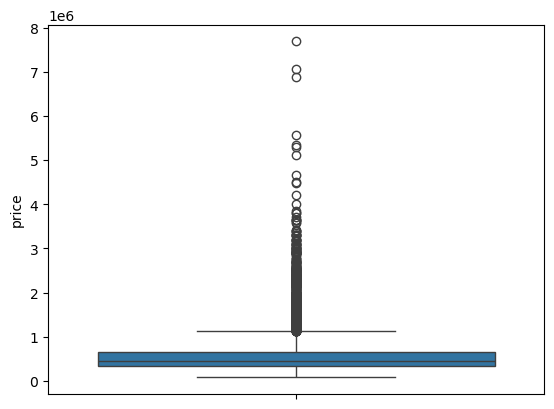

In [174]:
# Create boxplot for price variable
sns.boxplot(data=df['price'])
plt.show

In [175]:
# Viewing the results with the price higher than 7mln
df.sub = df[df['price'] >=7000000]

In [176]:
df.sub 

,property_id,date,price,bedrooms,bathrooms,sqft_living,sqft_land_area,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area
3914,9808700762,2014-06-11,7062500.00,5,4.50,10040,37325,2.00,1,2,3,11,7680,2360,1940,2001.00,98004,47.65,-122.21,3930,25449
7252,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,0,3,4,13,8570,3480,1910,1987.00,98102,47.63,-122.32,3940,8800


<function matplotlib.pyplot.show(close=None, block=None)>

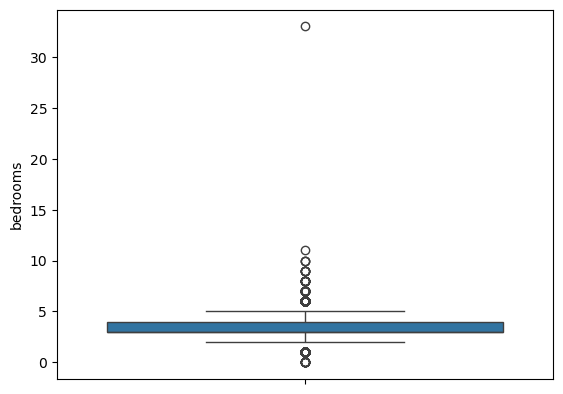

In [177]:
# Create boxplot for bedrooms variable
sns.boxplot(data=df['bedrooms'])
plt.show

In [178]:
# Dropping the outlier
df.drop(df[df.bedrooms == 33].index, inplace=True)

In [179]:
# Checking if the outlier was properly removed
df['bedrooms'].value_counts()

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
0       13
8       13
9        6
10       3
11       1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

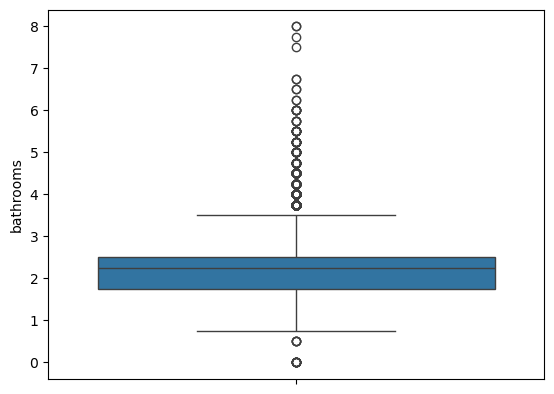

In [180]:
# Create boxplot for bathrooms variable
sns.boxplot(data=df['bathrooms'])
plt.show

In [181]:
df.sub = df[df['bathrooms']==8]

In [182]:
df.sub

,property_id,date,price,bedrooms,bathrooms,sqft_living,sqft_land_area,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area
7252,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,0,3,4,13,8570,3480,1910,1987.00,98102,47.63,-122.32,3940,8800
12777,1225069038,2014-05-05,2280000.00,7,8.00,13540,307752,3.00,0,4,3,12,9410,4130,1999,NaN,98053,47.67,-121.99,4850,217800


In such enourmous living and land area 8 bathrooms, althouh suspicious, but could be reasonable.

#### Final Data Check

In [183]:
df.head()

,property_id,date,price,bedrooms,bathrooms,sqft_living,sqft_land_area,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,NaN,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,NaN,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,NaN,98074,47.62,-122.05,1800,7503


In [184]:
df.shape

(21435, 21)

In [185]:
df.describe()

,property_id,date,price,bedrooms,bathrooms,sqft_living,sqft_land_area,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,latitude,longitude,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area
count,21435.00,21435,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,910.00,21435.00,21435.00,21435.00,21435.00
mean,4580866968.69,2014-10-29 17:38:33.170049024,541645.37,3.37,2.12,2082.73,15136.06,1.50,0.01,0.24,3.41,7.66,1791.00,291.73,1971.10,1995.90,47.56,-122.21,1988.35,12786.34
min,1000102.00,2014-05-02 00:00:00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,1934.00,47.16,-122.52,399.00,651.00
25%,2123700057.50,2014-07-22 00:00:00,324844.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1200.00,0.00,1952.00,1987.00,47.47,-122.33,1490.00,5100.00
50%,3904921250.00,2014-10-17 00:00:00,450000.00,3.00,2.25,1920.00,7614.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,2000.00,47.57,-122.23,1840.00,7620.00
75%,7308750075.00,2015-02-18 00:00:00,645000.00,4.00,2.50,2550.00,10696.50,2.00,0.00,0.00,4.00,8.00,2220.00,560.00,1997.00,2007.00,47.68,-122.12,2370.00,10087.50
max,9900000190.00,2015-05-27 00:00:00,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,47.78,-121.31,6210.00,871200.00
std,2876618243.24,NaN,367322.88,0.91,0.77,919.16,41539.54,0.54,0.09,0.77,0.65,1.17,829.03,442.79,29.39,15.50,0.14,0.14,685.70,27376.05


#### Data Export

In [186]:
# Exporting dataset
df.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'kc_house_data_wrangled.pkl'))